! pip install --upgrade category_encoders

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from collections import Counter
from datetime import datetime
import sklearn
import scipy.stats
import sklearn.model_selection 
import sklearn.preprocessing
import sklearn.linear_model
import category_encoders

file_path = '/Users/colemcnulty/Desktop/Capstone/roster detail for challenger athletics copy.csv'
df = pd.read_csv(file_path)

In [3]:
df_2 = df[['First', 'Last','Team']]
df_2.dropna()

df_2

,First,Last,Team
0,Ethan,Emmer,Athlete
1,Ethan,Emmer,Athlete
2,Ethan,Emmer,Athlete
3,Abigail,Abbatiello,Buddy
4,Anthony,Agresta,Athlete
...,...,...,...
1874,Luke,Zeller,Buddy
1875,Luke,Zeller,Buddy
1876,Charles,Zimmermann,Buddy
1877,Charlie,Zimmermann,Buddy


In [4]:
a_b_count = df_2[['Team']]

a_b_count = a_b_count.groupby(['Team']).agg({'Team':['count']}).reset_index()
a_b_count.columns = ['Team', 'Team_count']

a_b_count

,Team,Team_count
0,Athlete,1124
1,Buddy,755


In [5]:
###########
############
#### FINDING HOW MANY PEOPLE
###########
###########

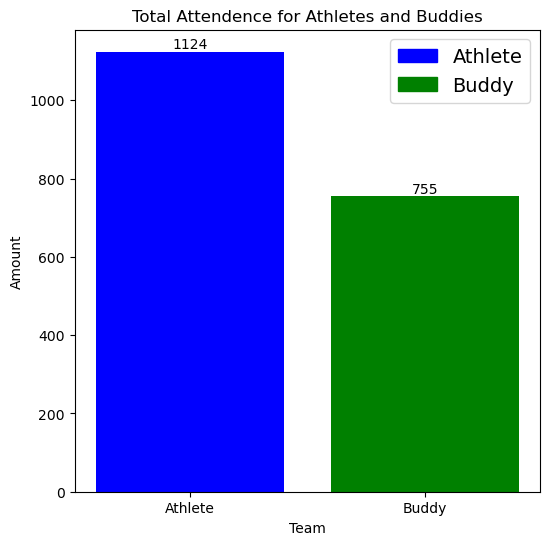

In [8]:
colors = ['blue', 'green']

ath = mpatches.Patch(color='blue', label='Athlete')
bub = mpatches.Patch(color='green', label='Buddy')

plt.figure(figsize=(6,6))
plt.bar(a_b_count['Team'], a_b_count['Team_count'], label='Players points', color = colors)
for i in range(len(a_b_count.Team)):
    plt.text(i, a_b_count.Team_count[i], str(a_b_count.Team_count[i]), ha='center', va='bottom')
plt.legend(loc='upper right', fontsize = 14)
plt.legend(handles=[ath, bub], fontsize = 14)
plt.title('Total Attendence for Athletes and Buddies')
plt.ylabel('Amount')
plt.xlabel('Team')
plt.show()


In [9]:
df_2['full_name'] = df_2['First'] + ' ' + df_2['Last']
df_2

/var/folders/ts/dx3l43p915746z76yryq64gc0000gn/T/ipykernel_2025/1222147866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['full_name'] = df_2['First'] + ' ' + df_2['Last']


,First,Last,Team,full_name
0,Ethan,Emmer,Athlete,Ethan Emmer
1,Ethan,Emmer,Athlete,Ethan Emmer
2,Ethan,Emmer,Athlete,Ethan Emmer
3,Abigail,Abbatiello,Buddy,Abigail Abbatiello
4,Anthony,Agresta,Athlete,Anthony Agresta
...,...,...,...,...
1874,Luke,Zeller,Buddy,Luke Zeller
1875,Luke,Zeller,Buddy,Luke Zeller
1876,Charles,Zimmermann,Buddy,Charles Zimmermann
1877,Charlie,Zimmermann,Buddy,Charlie Zimmermann


In [10]:
df_2.drop(columns=['First','Last'], inplace=True)
df_2

/var/folders/ts/dx3l43p915746z76yryq64gc0000gn/T/ipykernel_2025/1310448223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.drop(columns=['First','Last'], inplace=True)


,Team,full_name
0,Athlete,Ethan Emmer
1,Athlete,Ethan Emmer
2,Athlete,Ethan Emmer
3,Buddy,Abigail Abbatiello
4,Athlete,Anthony Agresta
...,...,...
1874,Buddy,Luke Zeller
1875,Buddy,Luke Zeller
1876,Buddy,Charles Zimmermann
1877,Buddy,Charlie Zimmermann


In [11]:
df_2['full_name'] = df_2['full_name'].str.strip()
df_2['full_name'] = df_2['full_name'].str.lower()
unique_df = df_2.drop_duplicates(subset=['full_name'], keep=False)


/var/folders/ts/dx3l43p915746z76yryq64gc0000gn/T/ipykernel_2025/955078513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['full_name'] = df_2['full_name'].str.strip()
/var/folders/ts/dx3l43p915746z76yryq64gc0000gn/T/ipykernel_2025/955078513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['full_name'] = df_2['full_name'].str.lower()


In [12]:
uniqued = unique_df[['Team']]
uniqued = uniqued.groupby(['Team']).agg({'Team':['count']}).reset_index()
uniqued.columns = ['Team', 'Team_count']


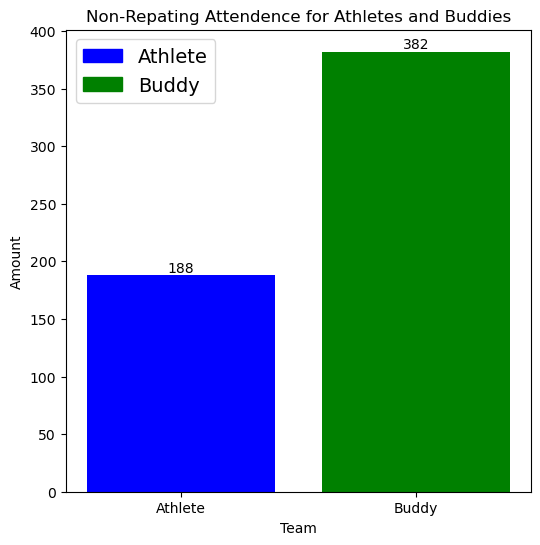

In [15]:
colors = ['blue', 'green']

ath = mpatches.Patch(color='blue', label='Athlete')
bub = mpatches.Patch(color='green', label='Buddy')

plt.figure(figsize=(6,6))
plt.bar(uniqued['Team'], uniqued['Team_count'], label='Players points', color = colors)
for i in range(len(uniqued.Team)):
    plt.text(i, uniqued.Team_count[i], str(uniqued.Team_count[i]), ha='center', va='bottom')
plt.legend(loc='upper right', fontsize = 14)
plt.legend(handles=[ath, bub], fontsize = 14)
plt.title('Non-Repating Attendence for Athletes and Buddies')
plt.ylabel('Amount')
plt.xlabel('Team')
plt.show()


In [12]:
###########
############
#### CLUSTURING FOR ATHLETES
###########
###########

In [33]:

city = df[['Team','City','First','Last']]
city['City'] = city['City'].str.strip()
city['City'] = city['City'].str.lower()

replacement_map = {
    'huntingon': 'huntington',
    'bayshore': 'bay shore',
    'st james': 'saint james',
    '19 brook ln.': '19 brook lane',
    'n babylon': 'north babylon',
    'selden terrace':'selden'
}

city['City'].replace(replacement_map, inplace=True)
city

/var/folders/ts/dx3l43p915746z76yryq64gc0000gn/T/ipykernel_2025/1049107340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city['City'] = city['City'].str.strip()
/var/folders/ts/dx3l43p915746z76yryq64gc0000gn/T/ipykernel_2025/1049107340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city['City'] = city['City'].str.lower()
/var/folders/ts/dx3l43p915746z76yryq64gc0000gn/T/ipykernel_2025/1049107340.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

,Team,City,First,Last
0,Athlete,patchogue,Ethan,Emmer
1,Athlete,patchogue,Ethan,Emmer
2,Athlete,patchogue,Ethan,Emmer
3,Buddy,east northport,Abigail,Abbatiello
4,Athlete,slp terrace,Anthony,Agresta
...,...,...,...,...
1874,Buddy,bay shore,Luke,Zeller
1875,Buddy,bay shore,Luke,Zeller
1876,Buddy,islip,Charles,Zimmermann
1877,Buddy,islip,Charlie,Zimmermann


In [34]:
city['full_name'] = city['First'] + ' ' + city['Last']

city['full_name'] = city['full_name'].str.strip()
city['full_name'] = city['full_name'].str.lower()
city = city.drop_duplicates(subset=['full_name'], keep=False)
city

/var/folders/ts/dx3l43p915746z76yryq64gc0000gn/T/ipykernel_2025/3540454160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city['full_name'] = city['First'] + ' ' + city['Last']
/var/folders/ts/dx3l43p915746z76yryq64gc0000gn/T/ipykernel_2025/3540454160.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city['full_name'] = city['full_name'].str.strip()
/var/folders/ts/dx3l43p915746z76yryq64gc0000gn/T/ipykernel_2025/3540454160.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,Team,City,First,Last,full_name
3,Buddy,east northport,Abigail,Abbatiello,abigail abbatiello
8,Athlete,bayport,Antonio,Aguirre,antonio aguirre
13,Athlete,selden,Joseph,Alberti,joseph alberti
14,Athlete,islip,Dennys,Alfaro,dennys alfaro
21,Buddy,bay shore,Nicholas,Alicanti,nicholas alicanti
...,...,...,...,...,...
1863,Buddy,west babylon,Alexander,Zapata,alexander zapata
1873,Athlete,islip,Donovan,Zecchini - M,donovan zecchini - m
1876,Buddy,islip,Charles,Zimmermann,charles zimmermann
1877,Buddy,islip,Charlie,Zimmermann,charlie zimmermann


In [35]:
city_a = city[(city['Team'] == 'Athlete')]
city_a = city['City']
city_a 

3       east northport
8              bayport
13              selden
14               islip
21           bay shore
             ...      
1863      west babylon
1873             islip
1876             islip
1877             islip
1878     islip terrace
Name: City, Length: 570, dtype: object

In [36]:
city_a_counts = city_a.value_counts()

In [37]:
city_a_counts_df = pd.DataFrame({'City': city_a_counts.index, 'Frequency': city_a_counts.values})
city_a_counts_df['Frequency_normalized'] = city_a_counts_df['Frequency'] / city_a_counts_df['Frequency'].sum()
city_a_counts_df

,City,Frequency,Frequency_normalized
0,bay shore,70,0.131086
1,babylon,59,0.110487
2,brightwaters,52,0.097378
3,lindenhurst,27,0.050562
4,west babylon,24,0.044944
...,...,...,...
89,garden city,1,0.001873
90,central islip,1,0.001873
91,old bethpage,1,0.001873
92,port washington,1,0.001873


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

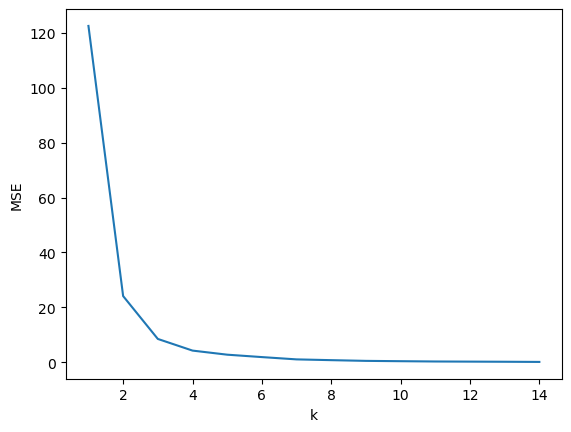

In [38]:
mseClusters=[]
dfSample = city_a_counts_df[['Frequency']]
for k in range(1,15): 
    clu = sklearn.cluster.KMeans(n_clusters=k) 
    clu.fit(dfSample) 
    mse = clu.inertia_ / len(dfSample) 
    mseClusters.append(mse) 
    
plt.plot(range(1,15), mseClusters) 
plt.xlabel('k')
plt.ylabel('MSE')
plt.show()

In [39]:
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(city_a_counts_df[['Frequency_normalized']])
city_a_counts_df['Cluster'] = kmeans.labels_


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


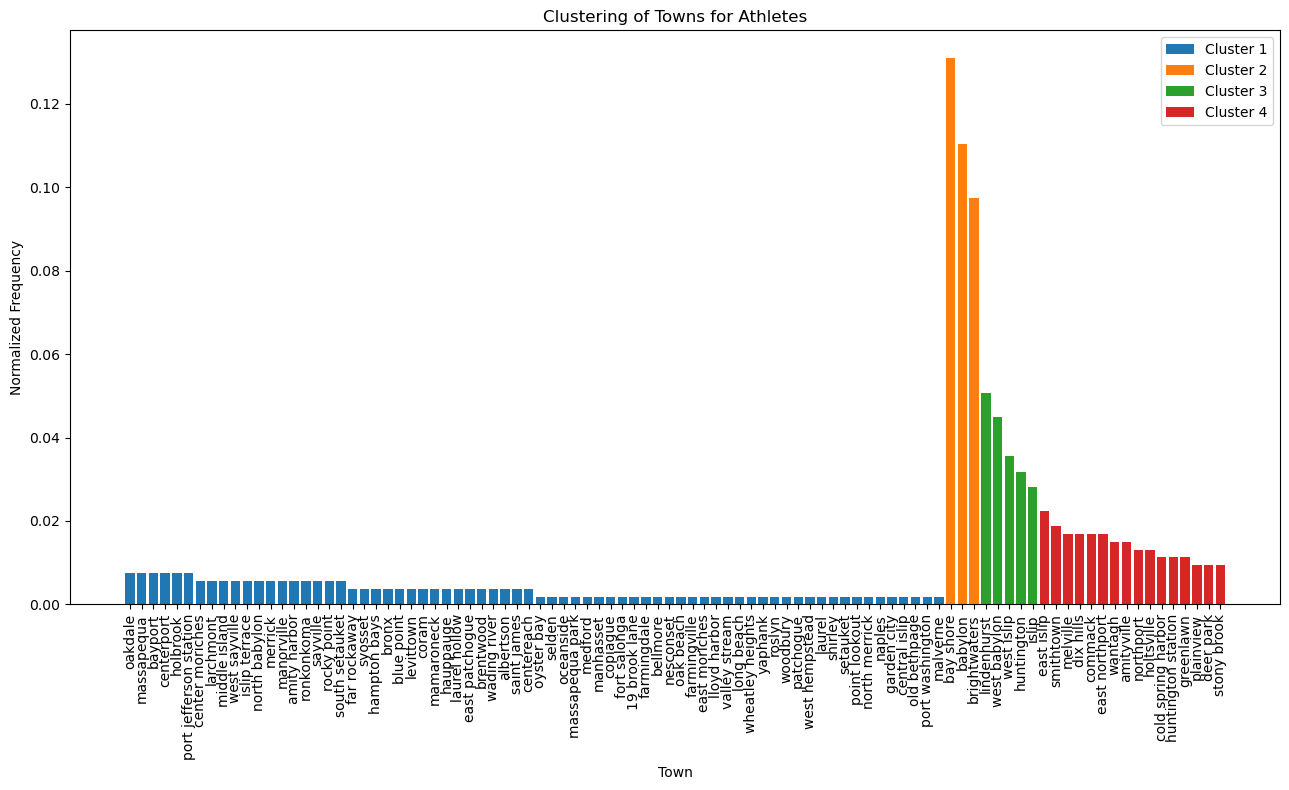

In [40]:
city_a_counts_df_sorted = city_a_counts_df.sort_values(by='Frequency_normalized', ascending=False)

plt.figure(figsize=(13, 8))
for cluster in range(num_clusters):
    cluster_data = city_a_counts_df[city_a_counts_df['Cluster'] == cluster]
    plt.bar(cluster_data['City'], cluster_data['Frequency_normalized'], label=f'Cluster {cluster+1}')
    
plt.xlabel('Town')
plt.ylabel('Normalized Frequency')
plt.title('Clustering of Towns for Athletes')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.savefig('A_cluster.png')

plt.show()

In [21]:
###########
############
#### CLUSTURING FOR BUDDY'S
###########
###########

In [22]:
city_b = city[(city['Team'] == 'Buddy')]
city_b = city_b['City']

city_b

3       east northport
21           bay shore
27             babylon
60        hampton bays
62           bay shore
             ...      
1834           syosset
1852      west babylon
1863      west babylon
1876             islip
1877             islip
Name: City, Length: 382, dtype: object

In [23]:
city_b_counts = city_b.value_counts()
city_b_counts

City
bay shore           60
babylon             55
brightwaters        48
lindenhurst         17
west babylon        16
                    ..
laurel               1
patchogue            1
woodbury             1
wheatley heights     1
syosset              1
Name: count, Length: 65, dtype: int64

In [24]:
city_b_counts_df = pd.DataFrame({'City': city_b_counts.index, 'Frequency': city_b_counts.values})
city_b_counts_df['Frequency_normalized'] = city_b_counts_df['Frequency'] / city_b_counts_df['Frequency'].sum()
city_b_counts_df

,City,Frequency,Frequency_normalized
0,bay shore,60,0.167131
1,babylon,55,0.153203
2,brightwaters,48,0.133705
3,lindenhurst,17,0.047354
4,west babylon,16,0.044568
...,...,...,...
60,laurel,1,0.002786
61,patchogue,1,0.002786
62,woodbury,1,0.002786
63,wheatley heights,1,0.002786


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

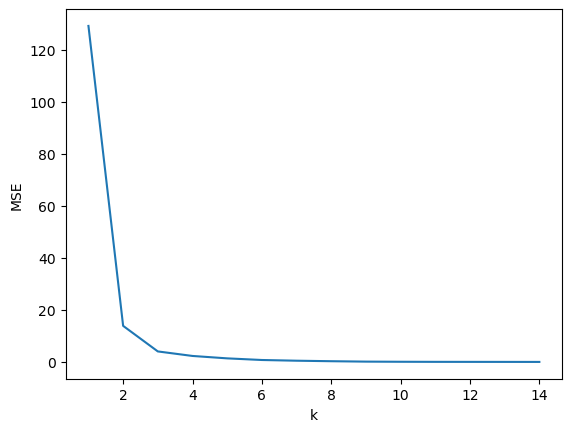

In [25]:
mseClusters=[]
dfSample = city_b_counts_df[['Frequency']]
for k in range(1,15): 
    clu = sklearn.cluster.KMeans(n_clusters=k) 
    clu.fit(dfSample) 
    mse = clu.inertia_ / len(dfSample) 
    mseClusters.append(mse) 
    
plt.plot(range(1,15), mseClusters) 
plt.xlabel('k')
plt.ylabel('MSE')
plt.show()

In [26]:
num_clusters =3
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(city_b_counts_df[['Frequency_normalized']])
city_b_counts_df['Cluster'] = kmeans.labels_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


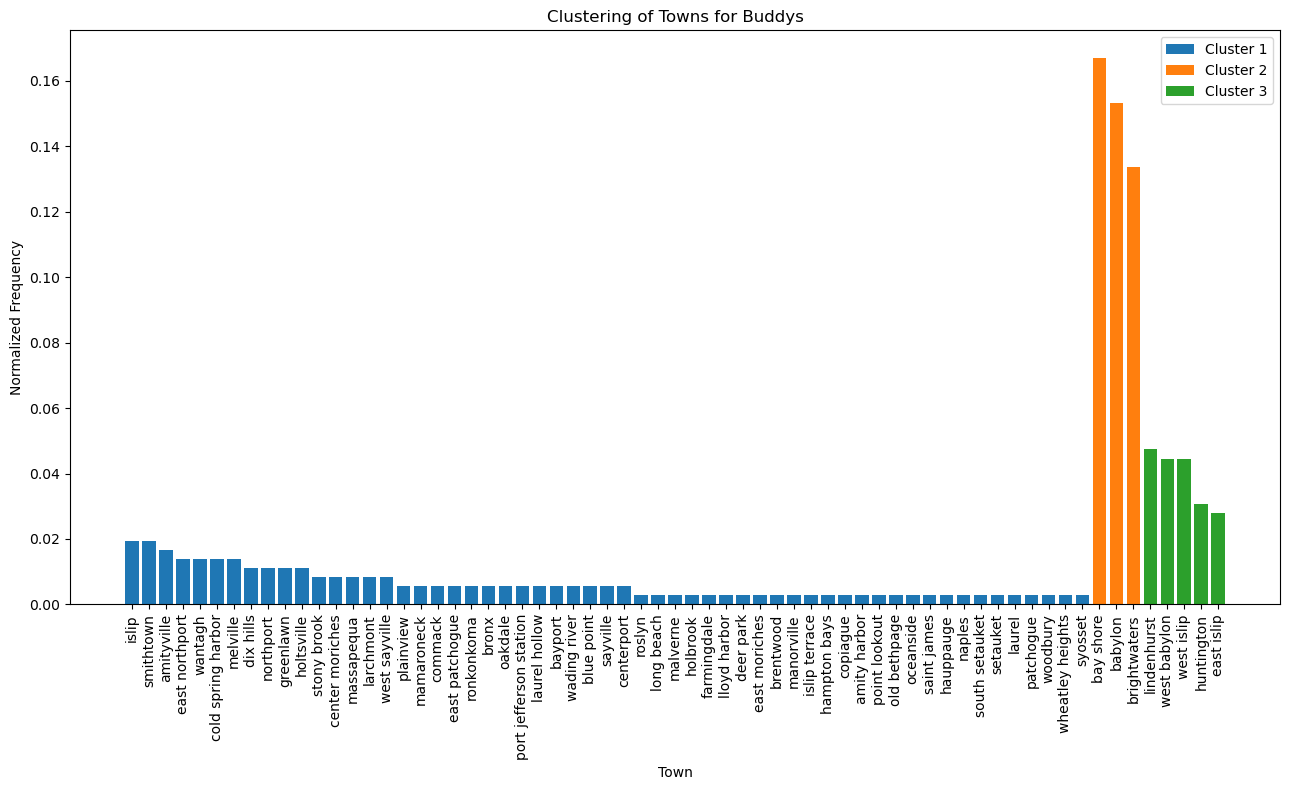

In [27]:
plt.figure(figsize=(13, 8))
for cluster in range(num_clusters):
    cluster_data = city_b_counts_df[city_b_counts_df['Cluster'] == cluster]
    plt.bar(cluster_data['City'], cluster_data['Frequency_normalized'], label=f'Cluster {cluster+1}')

plt.xlabel('Town')
plt.ylabel('Normalized Frequency')
plt.title('Clustering of Towns for Buddys')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.savefig('B_cluster.png')
plt.show()

In [28]:
###########
############
#### DIVISION BI CHART
###########
###########

In [28]:
division = df[['Division']]
division

,Division
0,Bowling
1,Bowling
2,Flag Football 2023
3,Basketball 2023
4,Bowling
...,...
1874,Flag Football 2023
1875,Lacrosse 2023
1876,SURF CAMP 2023
1877,Lacrosse 2023


In [29]:
unique_values = division['Division'].unique()
unique_values

array(['Bowling ', 'Flag Football 2023', 'Basketball 2023',
       'SURF CAMP 2023', 'Lacrosse 2023', 'Yoga ', 'Challenger Athletics',
       'Baseball 2023', 'Sports Camp 2023', 'Soccer 2023', 'Fish Trip',
       'Holiday Run/Walk ', 'Board Members '], dtype=object)

In [30]:
values_to_drop = ['Board Members ', 'Challenger Athletics']

droped_df = division[~division['Division'].isin(values_to_drop)]

unique_value = droped_df['Division'].unique()
droped_df

,Division
0,Bowling
1,Bowling
2,Flag Football 2023
3,Basketball 2023
4,Bowling
...,...
1873,Baseball 2023
1874,Flag Football 2023
1875,Lacrosse 2023
1876,SURF CAMP 2023


In [31]:
droped_df['Division'] = droped_df['Division'].str.strip()

replacement_map = {
    'Flag Football 2023': 'Flag Football',
    'SURF CAMP 2023': 'Surf Camp',
    'Lacrosse 2023': 'Lacrosse',
    'Basketball 2023': 'Basketball',
    'Baseball 2023': 'Baseball',
    'Soccer 2023':'Soccer',
    'Sports Camp 2023':'Sports Camp'
}

droped_df['Division'].replace(replacement_map, inplace=True)

droped_df

/var/folders/ts/dx3l43p915746z76yryq64gc0000gn/T/ipykernel_2025/990131187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  droped_df['Division'] = droped_df['Division'].str.strip()
/var/folders/ts/dx3l43p915746z76yryq64gc0000gn/T/ipykernel_2025/990131187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  droped_df['Division'].replace(replacement_map, inplace=True)


,Division
0,Bowling
1,Bowling
2,Flag Football
3,Basketball
4,Bowling
...,...
1873,Baseball
1874,Flag Football
1875,Lacrosse
1876,Surf Camp


In [32]:
droped_df['full_name'] = droped_df['First'] + ' ' + droped_df['Last']

droped_df['full_name'] = droped_df['full_name'].str.strip()
droped_df['full_name'] = droped_df['full_name'].str.lower()
droped_df = city.drop_duplicates(subset=['full_name'], keep=False)
droped_df

KeyError: 'First'

In [ ]:
droped_df = droped_df.groupby(['Division']).agg({'Division':['count']}).reset_index()
droped_df.columns = ['Division', 'Division_count']
droped_df

In [ ]:
droped_df_3 = droped_df.sort_values(by='Division_count', ascending=False)
droped_df_3

In [ ]:
plt.figure(figsize=(8,6))
bars = plt.bar(droped_df_3['Division'], droped_df_3['Division_count'], color='blue')
plt.xticks(rotation=90)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
plt.show()

In [ ]:
div_bi = df[['Division', 'Team','First','Last']]
div_bi 

In [ ]:
values_to_drop = ['Board Members ', 'Challenger Athletics']

div_bi = div_bi[~div_bi['Division'].isin(values_to_drop)]

In [21]:
div_bi['Division'] = div_bi['Division'].str.strip()

replacement_map = {
    'Flag Football 2023': 'Flag Football',
    'SURF CAMP 2023': 'Surf Camp',
    'Lacrosse 2023': 'Lacrosse',
    'Basketball 2023': 'Basketball',
    'Baseball 2023': 'Baseball',
    'Soccer 2023':'Soccer',
    'Sports Camp 2023':'Sports Camp'
}

div_bi['Division'].replace(replacement_map, inplace=True)

div_bi

NameError: name 'div_bi' is not defined

In [22]:
div_bi['full_name'] = div_bi['First'] + ' ' + div_bi['Last']

div_bi['full_name'] = div_bi['full_name'].str.strip()
div_bi['full_name'] = div_bi['full_name'].str.lower()
div_bi = div_bi.drop_duplicates(subset=['Division','full_name'], keep=False)
div_bi

NameError: name 'div_bi' is not defined

In [23]:
div_bi = div_bi.drop_duplicates(subset=['Division','full_name'], keep='first')
div_bi

NameError: name 'div_bi' is not defined

In [24]:
div_bi = div_bi.groupby(['Division','Team']).agg({'Division':['count']}).reset_index()
div_bi.columns = ['Division', 'team', 'count',]

div_bi

NameError: name 'div_bi' is not defined

In [25]:
div_bi=div_bi.pivot(index='Division', columns='team', values='count' )
div_bi

NameError: name 'div_bi' is not defined

In [26]:
 div_bi.fillna(0)

NameError: name 'div_bi' is not defined

NameError: name 'div_bi' is not defined

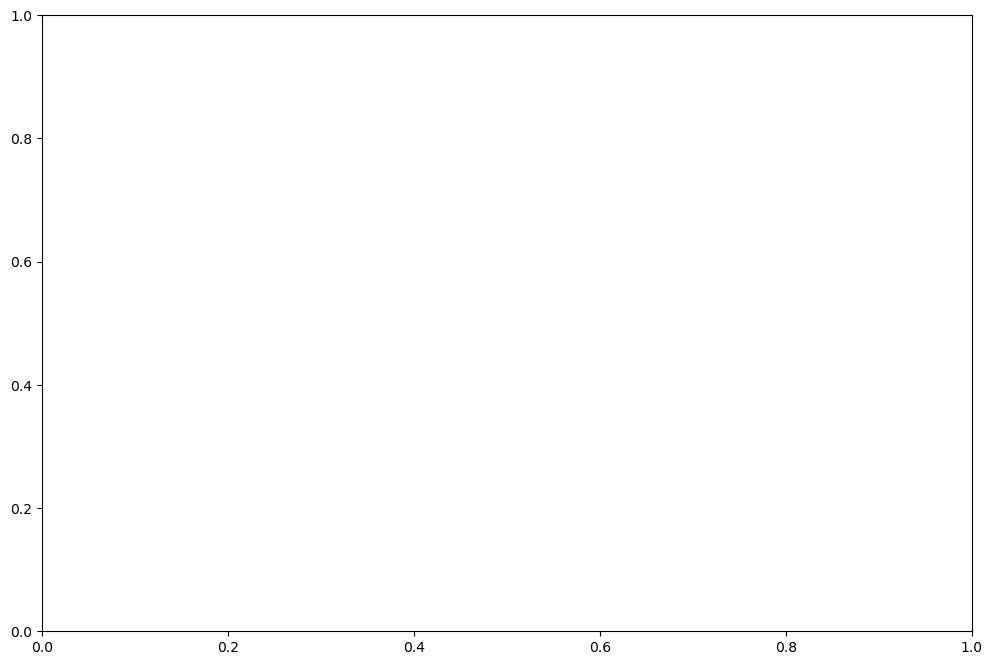

In [27]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
colors = ['lightblue', 'lightgreen']
div_bi.plot(kind='bar', stacked=True, ax=ax, color=colors)

plt.ylabel('Team Amount', fontsize = 14, labelpad=10)
plt.title('How Many Buddys and Athletes Attend a Division', fontsize = 14)
plt.yticks(fontsize=7)
ax.set_xlabel('Divsions',fontsize=12)
plt.xticks(fontsize=8, rotation=340)
for c in ax.containers:
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')
plt.savefig('bi_graph_n.png')

plt.show()

In [19]:
###########
############
#### DESITION TREE
###########
###########

In [63]:
school = df[['Team','School District']]
school['School District'] = school['School District'].str.strip()
school['School District'] = school['School District'].str.lower()
un = school['School District'].unique()


/var/folders/ts/dx3l43p915746z76yryq64gc0000gn/T/ipykernel_2025/1402518051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school['School District'] = school['School District'].str.strip()
/var/folders/ts/dx3l43p915746z76yryq64gc0000gn/T/ipykernel_2025/1402518051.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school['School District'] = school['School District'].str.lower()


In [64]:
tree_df = df[['Team','City', 'Birthdate', 'Division','Gender','First','Last']]


In [65]:
tree_df['City'] = tree_df['City'].str.strip()
tree_df['City'] = tree_df['City'].str.lower()

replacement_map = {
    'huntingon': 'huntington',
    'bayshore': 'bay shore',
    'st james': 'saint james',
    '19 brook ln.': '19 brook lane',
    'n babylon': 'north babylon',
    'selden terrace':'selden'
}

tree_df['City'].replace(replacement_map, inplace=True)
tree_df

/var/folders/ts/dx3l43p915746z76yryq64gc0000gn/T/ipykernel_2025/2197742738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_df['City'] = tree_df['City'].str.strip()
/var/folders/ts/dx3l43p915746z76yryq64gc0000gn/T/ipykernel_2025/2197742738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_df['City'] = tree_df['City'].str.lower()
/var/folders/ts/dx3l43p915746z76yryq64gc0000gn/T/ipykernel_2025/2197742738.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,Team,City,Birthdate,Division,Gender,First,Last
0,Athlete,patchogue,2/12/2009,Bowling,Male,Ethan,Emmer
1,Athlete,patchogue,2/12/2009,Bowling,Male,Ethan,Emmer
2,Athlete,patchogue,2/12/2009,Flag Football 2023,Male,Ethan,Emmer
3,Buddy,east northport,4/19/2011,Basketball 2023,Female,Abigail,Abbatiello
4,Athlete,slp terrace,7/26/2004,Bowling,Male,Anthony,Agresta
...,...,...,...,...,...,...,...
1874,Buddy,bay shore,8/17/2006,Flag Football 2023,Male,Luke,Zeller
1875,Buddy,bay shore,NaN,Lacrosse 2023,Male,Luke,Zeller
1876,Buddy,islip,6/14/2006,SURF CAMP 2023,Male,Charles,Zimmermann
1877,Buddy,islip,NaN,Lacrosse 2023,Male,Charlie,Zimmermann


In [66]:
tree_df['Division'] = tree_df['Division'].str.strip()

replacement_map = {
    'Flag Football 2023': 'Flag Football',
    'SURF CAMP 2023': 'Surf Camp',
    'Lacrosse 2023': 'Lacrosse',
    'Basketball 2023': 'Basketball',
    'Baseball 2023': 'Baseball',
    'Soccer 2023':'Soccer',
    'Sports Camp 2023':'Sports Camp'
}

tree_df['Division'].replace(replacement_map, inplace=True)

tree_df

/var/folders/ts/dx3l43p915746z76yryq64gc0000gn/T/ipykernel_2025/3846772959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_df['Division'] = tree_df['Division'].str.strip()
/var/folders/ts/dx3l43p915746z76yryq64gc0000gn/T/ipykernel_2025/3846772959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_df['Division'].replace(replacement_map, inplace=True)


,Team,City,Birthdate,Division,Gender,First,Last
0,Athlete,patchogue,2/12/2009,Bowling,Male,Ethan,Emmer
1,Athlete,patchogue,2/12/2009,Bowling,Male,Ethan,Emmer
2,Athlete,patchogue,2/12/2009,Flag Football,Male,Ethan,Emmer
3,Buddy,east northport,4/19/2011,Basketball,Female,Abigail,Abbatiello
4,Athlete,slp terrace,7/26/2004,Bowling,Male,Anthony,Agresta
...,...,...,...,...,...,...,...
1874,Buddy,bay shore,8/17/2006,Flag Football,Male,Luke,Zeller
1875,Buddy,bay shore,NaN,Lacrosse,Male,Luke,Zeller
1876,Buddy,islip,6/14/2006,Surf Camp,Male,Charles,Zimmermann
1877,Buddy,islip,NaN,Lacrosse,Male,Charlie,Zimmermann


In [67]:
tree_df
tree_df['Birthdate'] = pd.to_datetime(tree_df['Birthdate'])

current_date = datetime.now()
tree_df['Age'] = current_date.year - tree_df['Birthdate'].dt.year


/var/folders/ts/dx3l43p915746z76yryq64gc0000gn/T/ipykernel_2025/3238141635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_df['Birthdate'] = pd.to_datetime(tree_df['Birthdate'])
/var/folders/ts/dx3l43p915746z76yryq64gc0000gn/T/ipykernel_2025/3238141635.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_df['Age'] = current_date.year - tree_df['Birthdate'].dt.year


In [68]:
tree_df.drop(columns=['Birthdate'], inplace=True)


/var/folders/ts/dx3l43p915746z76yryq64gc0000gn/T/ipykernel_2025/241457360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_df.drop(columns=['Birthdate'], inplace=True)


In [69]:
tree_df = tree_df.dropna()
tree_df

,Team,City,Division,Gender,First,Last,Age
0,Athlete,patchogue,Bowling,Male,Ethan,Emmer,15.0
1,Athlete,patchogue,Bowling,Male,Ethan,Emmer,15.0
2,Athlete,patchogue,Flag Football,Male,Ethan,Emmer,15.0
3,Buddy,east northport,Basketball,Female,Abigail,Abbatiello,13.0
4,Athlete,slp terrace,Bowling,Male,Anthony,Agresta,20.0
...,...,...,...,...,...,...,...
1872,Athlete,islip,Surf Camp,Male,Donovan,Zecchini,18.0
1873,Athlete,islip,Baseball,Male,Donovan,Zecchini - M,18.0
1874,Buddy,bay shore,Flag Football,Male,Luke,Zeller,18.0
1876,Buddy,islip,Surf Camp,Male,Charles,Zimmermann,18.0


In [70]:
tree_df['full_name'] = tree_df['First'] + ' ' + tree_df['Last']

tree_df['full_name'] = tree_df['full_name'].str.strip()
tree_df['full_name'] = tree_df['full_name'].str.lower()
tree_df = tree_df.drop_duplicates(subset=['Division','full_name'], keep=False)
tree_df

/var/folders/ts/dx3l43p915746z76yryq64gc0000gn/T/ipykernel_2025/1616046956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_df['full_name'] = tree_df['First'] + ' ' + tree_df['Last']
/var/folders/ts/dx3l43p915746z76yryq64gc0000gn/T/ipykernel_2025/1616046956.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_df['full_name'] = tree_df['full_name'].str.strip()
/var/folders/ts/dx3l43p915746z76yryq64gc0000gn/T/ipykernel_2025/1616046956.py:4: SettingWithCopyWarning: 
A value is trying to be set on a

,Team,City,Division,Gender,First,Last,Age,full_name
2,Athlete,patchogue,Flag Football,Male,Ethan,Emmer,15.0,ethan emmer
3,Buddy,east northport,Basketball,Female,Abigail,Abbatiello,13.0,abigail abbatiello
4,Athlete,slp terrace,Bowling,Male,Anthony,Agresta,20.0,anthony agresta
5,Athlete,slp terrace,Surf Camp,Male,Anthony,Agresta,20.0,anthony agresta
7,Athlete,slp terrace,Yoga,Male,Anthony,Agresta,20.0,anthony agresta
...,...,...,...,...,...,...,...,...
1872,Athlete,islip,Surf Camp,Male,Donovan,Zecchini,18.0,donovan zecchini
1873,Athlete,islip,Baseball,Male,Donovan,Zecchini - M,18.0,donovan zecchini - m
1874,Buddy,bay shore,Flag Football,Male,Luke,Zeller,18.0,luke zeller
1876,Buddy,islip,Surf Camp,Male,Charles,Zimmermann,18.0,charles zimmermann


In [71]:
tree_df.drop(columns=['First','Last','full_name'], inplace=True)
tree_df

/var/folders/ts/dx3l43p915746z76yryq64gc0000gn/T/ipykernel_2025/3653630450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_df.drop(columns=['First','Last','full_name'], inplace=True)


,Team,City,Division,Gender,Age
2,Athlete,patchogue,Flag Football,Male,15.0
3,Buddy,east northport,Basketball,Female,13.0
4,Athlete,slp terrace,Bowling,Male,20.0
5,Athlete,slp terrace,Surf Camp,Male,20.0
7,Athlete,slp terrace,Yoga,Male,20.0
...,...,...,...,...,...
1872,Athlete,islip,Surf Camp,Male,18.0
1873,Athlete,islip,Baseball,Male,18.0
1874,Buddy,bay shore,Flag Football,Male,18.0
1876,Buddy,islip,Surf Camp,Male,18.0


In [50]:
def is_loan_approved(column_value):
    if(column_value == 'Athlete'):
        return 1
    else:
        return 0

tree_df['is_athlete'] = tree_df.Team.apply(lambda x : is_loan_approved(x))
tree_df['baseline_yes'] = 1 # Baseline Model always yes
tree_df['baseline_no'] = 0 # Baseline Model always no

tree_df

/var/folders/ts/dx3l43p915746z76yryq64gc0000gn/T/ipykernel_2025/149160634.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_df['is_athlete'] = tree_df.Team.apply(lambda x : is_loan_approved(x))
/var/folders/ts/dx3l43p915746z76yryq64gc0000gn/T/ipykernel_2025/149160634.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_df['baseline_yes'] = 1 # Baseline Model always yes
/var/folders/ts/dx3l43p915746z76yryq64gc0000gn/T/ipykernel_2025/149160634.py:9: SettingWithCopyWarning: 
A value is trying to be 

,Team,City,Division,Gender,Age,is_athlete,baseline_yes,baseline_no
2,Athlete,patchogue,Flag Football,Male,15.0,1,1,0
3,Buddy,east northport,Basketball,Female,13.0,0,1,0
4,Athlete,slp terrace,Bowling,Male,20.0,1,1,0
5,Athlete,slp terrace,Surf Camp,Male,20.0,1,1,0
7,Athlete,slp terrace,Yoga,Male,20.0,1,1,0
...,...,...,...,...,...,...,...,...
1872,Athlete,islip,Surf Camp,Male,18.0,1,1,0
1873,Athlete,islip,Baseball,Male,18.0,1,1,0
1874,Buddy,bay shore,Flag Football,Male,18.0,0,1,0
1876,Buddy,islip,Surf Camp,Male,18.0,0,1,0


In [51]:
sport_dummies = pd.get_dummies(tree_df['Division'], prefix='Division', dtype= int)
tree_df = pd.concat([tree_df, sport_dummies], axis=1)
tree_df.drop('Division', axis=1, inplace=True)

tree_df

,Team,City,Gender,Age,is_athlete,baseline_yes,baseline_no,Division_Baseball,Division_Basketball,Division_Bowling,Division_Challenger Athletics,Division_Fish Trip,Division_Flag Football,Division_Holiday Run/Walk,Division_Lacrosse,Division_Soccer,Division_Sports Camp,Division_Surf Camp,Division_Yoga
2,Athlete,patchogue,Male,15.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,Buddy,east northport,Female,13.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Athlete,slp terrace,Male,20.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
5,Athlete,slp terrace,Male,20.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
7,Athlete,slp terrace,Male,20.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,Athlete,islip,Male,18.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1873,Athlete,islip,Male,18.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1874,Buddy,bay shore,Male,18.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1876,Buddy,islip,Male,18.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [52]:
replacement_map = {
    'bay shore': 4,
    'babylon': 4,
    'brightwaters': 4,
    'west babylon': 3,
    'lindenhurst': 3,
    'islip': 3,
    'west islip': 2,
    'east northport': 2,
    'holbrook': 2,
    'commack': 2,
    'deer park': 2,
    'dix hills': 2,
    'centereach': 2,
    'huntington': 2,
    'patchogue': 2,
    'brentwood': 2,
    'smithtown': 2,
    'south setauket': 2,
    'wantagh': 2,
    'amityville': 2,
    'melville': 2,
    'east islip': 2,
    'massapequa': 2,
    'huntington station': 2,
     'coram': 1,
    'shirley': 1,
    'miller place': 1,
    'greenlawn': 1,
    'ridge': 1,
    'holtsville': 1,
    'northport': 1,
    'north babylon': 1,
    'copiague': 1,
    'saint james': 1,
    'seaford': 1,
    'hauppauge': 1,
    'east patchogue': 1,
    'hampton bays': 1,
    'bayport': 1,
    'east hampton': 1,
    'bronx': 1,
    'farmingville': 1,
    'blue point': 1,
    'lake grove': 1,
    'merrick': 1,
    'albertson': 1,
    'islip terrace': 1,
    'ronkonkoma': 1,
    'cold spring harbor': 1,
    'port jefferson': 1,
    'plainview': 1,
    'oak beach': 1,
    'great river': 1,
    'stony brook': 1,
    'oakdale': 1,
    'centerport': 1,
    'mount sinai': 1,
    'east setauket': 1,
    'laurel hollow': 1,
    'shoreham': 1,
    'new hyde park': 1,
    'selden': 1,
    'north merrick': 1,
    'wheatley heights': 1,
    'east moriches': 1,
    'port jefferson station': 1,
    'rockville centre': 1,
    'lynbrook': 1,
    'farmingdale': 1,
    'slp terrace': 1,
    'lloyd harbor': 1,
    'syosset': 1,
    'middle island': 1,
    'sayville': 1,
    'rocky point': 1,
    'west sayville': 1,
    'central islip': 1,
    'center moriches': 1,
    'larchmont': 1,
    'amity harbor': 1,
    'manorville': 1,
    'old bethpage': 1,
    'medford': 1,
    'bellmore': 1,
    'hicksville': 1,
    'far rockaway': 1,
    'bohemia': 1,
    'baldwin': 1,
    'levittown': 1,
    'wading river': 1,
    'mamaroneck': 1,
    'hauppauge': 1,
    'long beach': 1,
    'west hempstead': 1,
    'malverne': 1,
    'nesconset': 1,
    'oceanside': 1,
    'oyster bay': 1,
    'point lookout': 1,
    'setauket': 1,
    '19 brook lane': 1,
    'laurel': 1,
    'woodbury': 1,
    'fort salonga': 1,
    'yaphank': 1,
    'port washington': 1,
    'garden city': 1,
    'manhasset': 1,
    'valley stream': 1,
    'massapequa park': 1,
    'roslyn': 1,
    'naples': 1,
    'hauppague': 1
    	
}
tree_df['City'].replace(replacement_map, inplace=True)
tree_df


,Team,City,Gender,Age,is_athlete,baseline_yes,baseline_no,Division_Baseball,Division_Basketball,Division_Bowling,Division_Challenger Athletics,Division_Fish Trip,Division_Flag Football,Division_Holiday Run/Walk,Division_Lacrosse,Division_Soccer,Division_Sports Camp,Division_Surf Camp,Division_Yoga
2,Athlete,2,Male,15.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,Buddy,2,Female,13.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Athlete,1,Male,20.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
5,Athlete,1,Male,20.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
7,Athlete,1,Male,20.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,Athlete,3,Male,18.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1873,Athlete,3,Male,18.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1874,Buddy,4,Male,18.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1876,Buddy,3,Male,18.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [53]:
dfTrain, dfTest = sklearn.model_selection.train_test_split(tree_df, test_size = 0.25, random_state = 303)

dfTrain

,Team,City,Gender,Age,is_athlete,baseline_yes,baseline_no,Division_Baseball,Division_Basketball,Division_Bowling,Division_Challenger Athletics,Division_Fish Trip,Division_Flag Football,Division_Holiday Run/Walk,Division_Lacrosse,Division_Soccer,Division_Sports Camp,Division_Surf Camp,Division_Yoga
937,Buddy,4,Female,16.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
349,Athlete,4,Female,45.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1434,Athlete,2,Male,14.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1493,Athlete,3,Male,18.0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0
16,Athlete,2,Male,20.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709,Athlete,3,Male,14.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1097,Athlete,2,Male,9.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1873,Athlete,3,Male,18.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
866,Buddy,4,Male,18.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [54]:
encoder = category_encoders.OrdinalEncoder(cols=['Gender'])

#### PAY ATTENTION
dfTrain = encoder.fit_transform(dfTrain) 

dfTest = encoder.transform(dfTest)

dfTrain

,Team,City,Gender,Age,is_athlete,baseline_yes,baseline_no,Division_Baseball,Division_Basketball,Division_Bowling,Division_Challenger Athletics,Division_Fish Trip,Division_Flag Football,Division_Holiday Run/Walk,Division_Lacrosse,Division_Soccer,Division_Sports Camp,Division_Surf Camp,Division_Yoga
937,Buddy,4,1,16.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
349,Athlete,4,1,45.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1434,Athlete,2,2,14.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1493,Athlete,3,2,18.0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0
16,Athlete,2,2,20.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709,Athlete,3,2,14.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1097,Athlete,2,2,9.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1873,Athlete,3,2,18.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
866,Buddy,4,2,18.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [72]:
lstSelectedAttributes = ['Age','City','Division_Baseball','Division_Bowling','Division_Fish Trip','Division_Flag Football','Division_Holiday Run/Walk','Division_Lacrosse','Division_Soccer','Division_Sports Camp','Division_Surf Camp','Division_Yoga']
target = 'is_athlete' 

modelath = sklearn.tree.DecisionTreeClassifier(max_depth=9) 

modelath.fit( dfTrain[lstSelectedAttributes], dfTrain[target] ) 

lstPred = modelath.predict( dfTest[lstSelectedAttributes] )

lstPred

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0])

In [73]:
lstPredProb = modelath.predict_proba( dfTest[lstSelectedAttributes] ) 
print(lstPredProb[:,1])

[1.         0.         1.         0.89655172 0.27272727 1.
 0.41818182 0.         1.         1.         0.41818182 0.
 0.59574468 1.         0.21052632 1.         0.24137931 0.59574468
 1.         1.         0.59574468 0.41818182 0.         1.
 1.         0.33333333 0.06060606 0.24137931 1.         0.41818182
 1.         0.41818182 0.         0.6        1.         0.59574468
 0.59574468 1.         1.         0.81818182 0.6        1.
 0.41818182 1.         0.41818182 1.         1.         0.24137931
 0.64285714 0.41818182 0.24137931 0.41818182 0.375      0.
 0.         1.         1.         1.         1.         1.
 0.         0.41818182 0.64285714 1.         0.41818182 0.1
 0.         1.         0.27272727 0.59574468 0.8125     0.21052632
 0.         0.06060606 1.         0.41818182 0.41818182 1.
 0.24137931 1.         0.21052632 0.81818182 0.41818182 1.
 1.         0.06060606 0.         1.         0.         0.89655172
 1.         0.         0.41818182 0.         1.         1.
 0.    

In [74]:
modAcc = sklearn.metrics.accuracy_score( dfTest[target], lstPred)
yesAcc = sklearn.metrics.accuracy_score( dfTest[target], dfTest.baseline_yes)
noAcc = sklearn.metrics.accuracy_score( dfTest[target], dfTest.baseline_no)
print('Accuracy - Model:', modAcc, 'Baseline Yes:', yesAcc, 'Baseline No:', noAcc)

modPrec = sklearn.metrics.precision_score( dfTest[target], lstPred) 
yesPrec = sklearn.metrics.precision_score( dfTest[target], dfTest.baseline_yes)
noPrec = sklearn.metrics.precision_score( dfTest[target], dfTest.baseline_no)
print('Precision - Model:', modPrec, 'Baseline Yes:', yesPrec, 'Baseline No:', noPrec)

modRec = sklearn.metrics.recall_score( dfTest[target], lstPred)
yesRec = sklearn.metrics.recall_score( dfTest[target], dfTest.baseline_yes)
noRec = sklearn.metrics.recall_score( dfTest[target], dfTest.baseline_no)
print('Recall - Model:', modRec, 'Baseline Yes:', yesRec, 'Baseline No:', noRec)

modF1 = sklearn.metrics.f1_score( dfTest[target], lstPred) 
yesF1 = sklearn.metrics.f1_score( dfTest[target], dfTest.baseline_yes)
noF1 = sklearn.metrics.f1_score( dfTest[target], dfTest.baseline_no)
print('F1 - Model:', modF1, 'Baseline Yes:', yesF1, 'Baseline No:', noF1 )

Accuracy - Model: 0.7758620689655172 Baseline Yes: 0.5620689655172414 Baseline No: 0.4379310344827586
Precision - Model: 0.8402777777777778 Baseline Yes: 0.5620689655172414 Baseline No: 0.0
Recall - Model: 0.7423312883435583 Baseline Yes: 1.0 Baseline No: 0.0
F1 - Model: 0.7882736156351792 Baseline Yes: 0.7196467991169978 Baseline No: 0.0


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
modAuc = sklearn.metrics.roc_auc_score(dfTest[target], lstPredProb[:,1]) 
print('AUC', modAuc)

AUC 0.8618182696488093


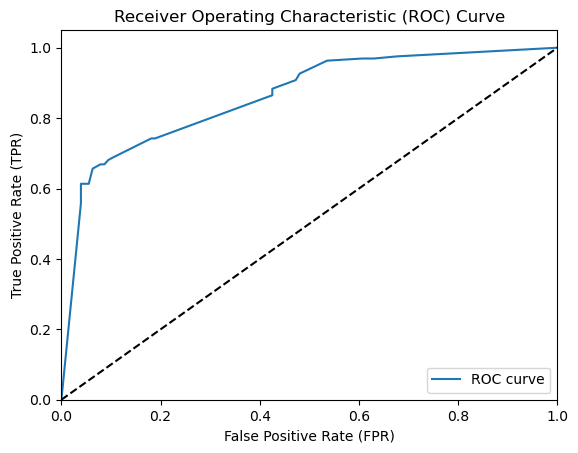

In [76]:
fpr, tpr, decisionTresholds = sklearn.metrics.roc_curve(dfTest[target], lstPredProb[:,1])

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')  # 45-degree diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

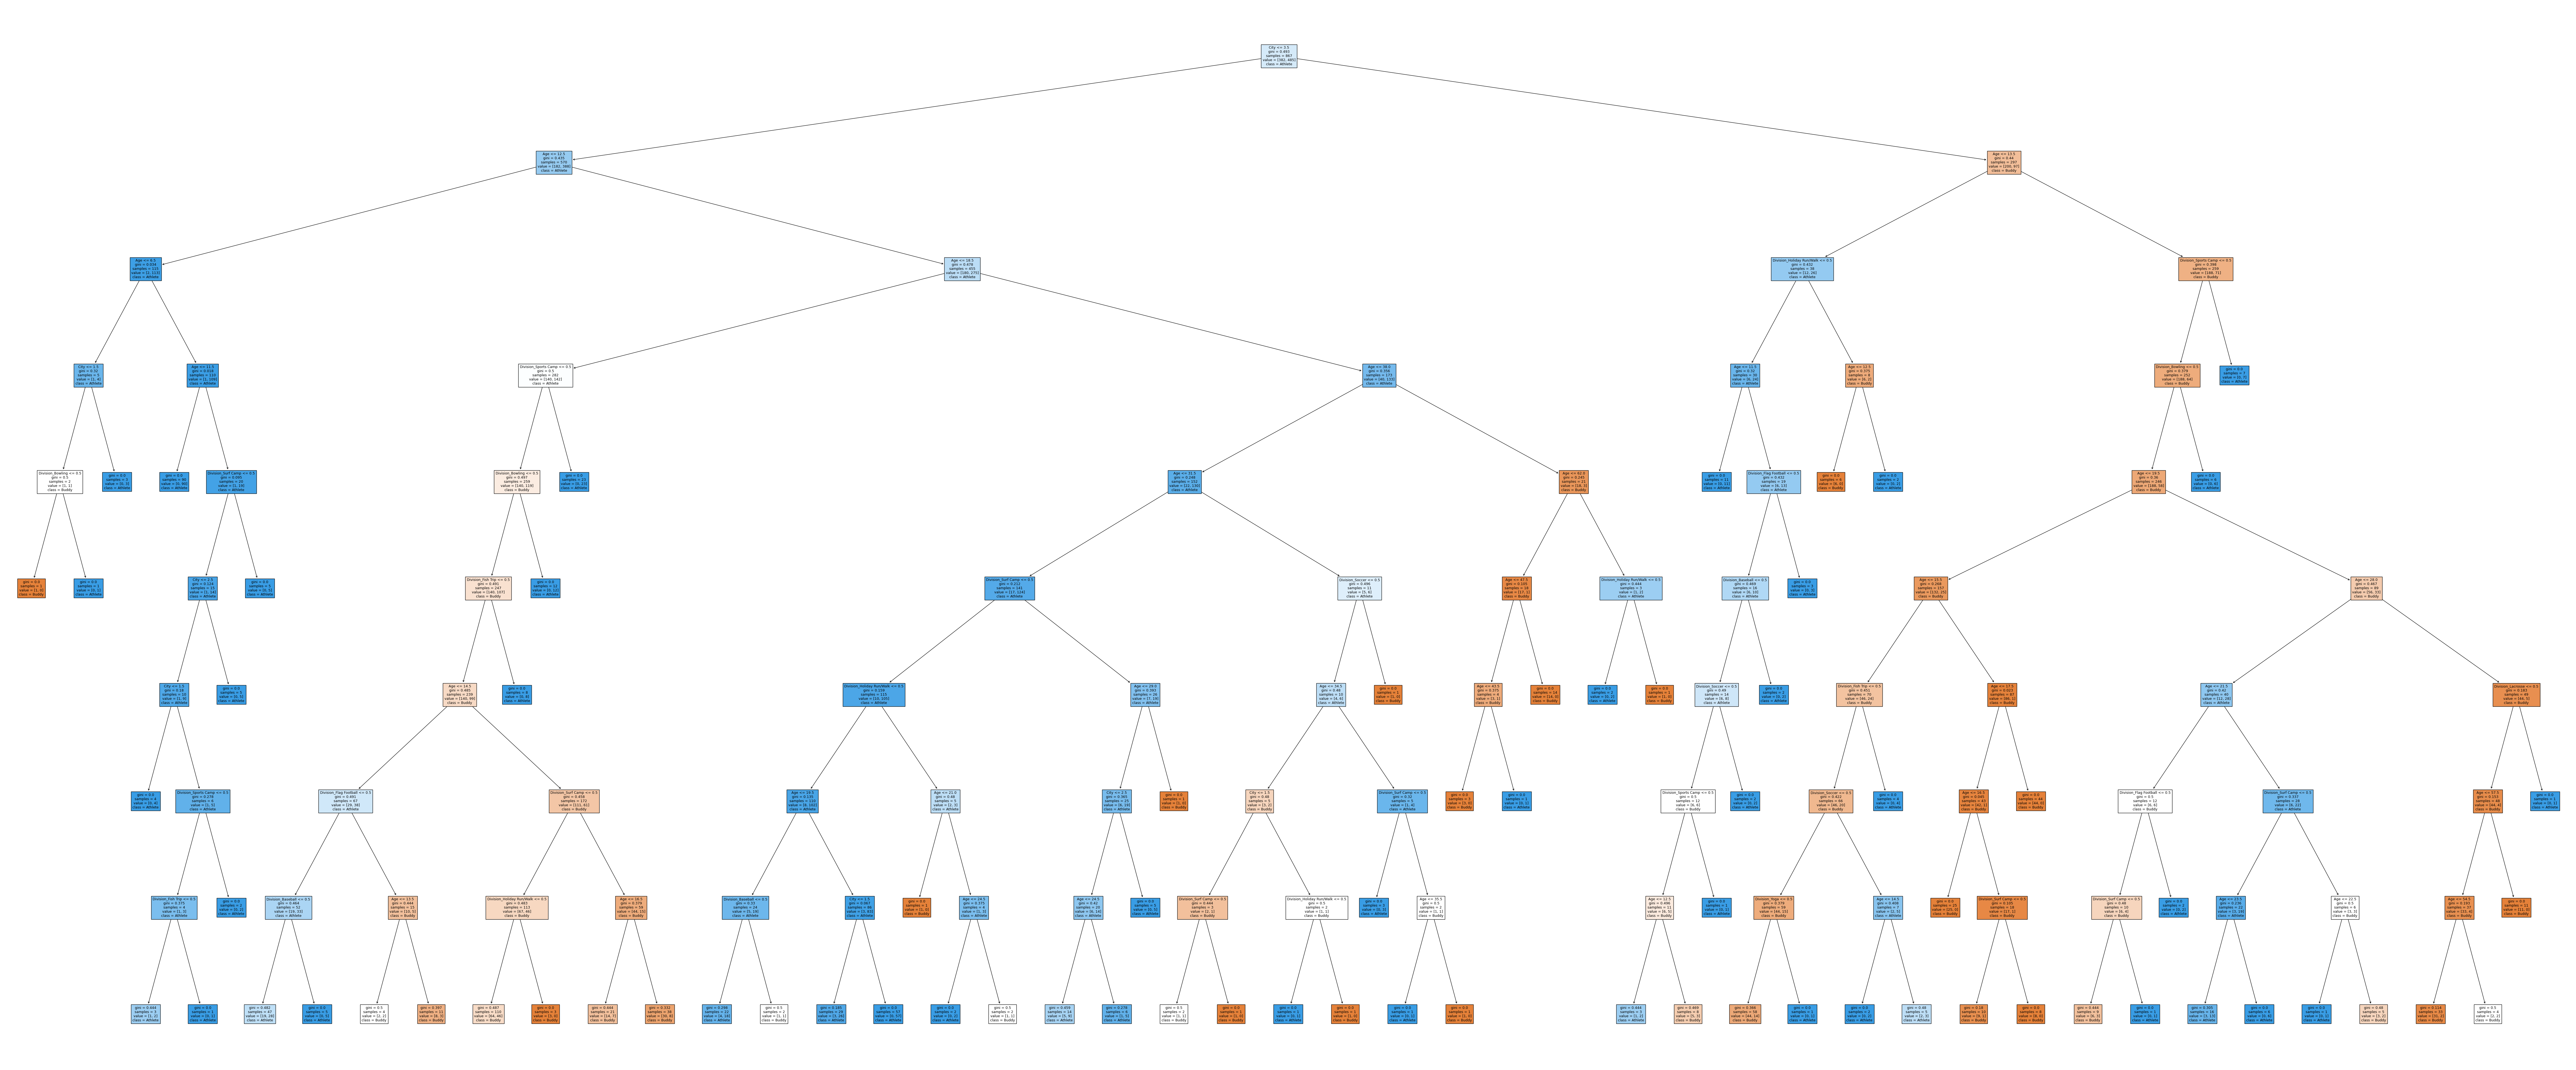

In [78]:
plt.figure(figsize=(120, 50)) 
sklearn.tree.plot_tree(modelath, filled=True,fontsize=9, feature_names=lstSelectedAttributes, class_names=['Buddy','Athlete']) 
plt.savefig('with_surfcamp.PDF', bbox_inches='tight') 
plt.show()